In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
print('Imports Check!')

Imports Check!


In [2]:
train = pd.read_csv(r"C:\Users\vedan\Downloads\train(5).csv")
test = pd.read_csv(r"C:\Users\vedan\Downloads\test(5).csv")
train

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [3]:
nan_counts = train.isna().sum()
print("NaN counts per column:")
print(nan_counts)

NaN counts per column:
id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64


In [4]:
for df in [test,train]:
    df['Episode_Length_minutes'] = df.groupby('Podcast_Name')['Episode_Length_minutes'].transform(lambda x: x.fillna(x.median()))
    df['Episode_Length_minutes'].fillna(df['Episode_Length_minutes'].median(), inplace = True)
    df['Number_of_Ads'] = df.groupby('Podcast_Name')['Number_of_Ads'].transform(lambda x: x.fillna(x.median()))

C:\Users\vedan\AppData\Local\Temp\ipykernel_7384\854233256.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Episode_Length_minutes'].fillna(df['Episode_Length_minutes'].median(), inplace = True)
C:\Users\vedan\AppData\Local\Temp\ipykernel_7384\854233256.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [5]:
cat_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    category_target_rate = train.groupby(col)['Listening_Time_minutes'].mean()
    print(category_target_rate)

Podcast_Name
Athlete's Arena        46.634791
Brain Boost            44.409651
Business Briefs        47.121103
Business Insights      44.213344
Comedy Corner          43.930314
Crime Chronicles       47.678948
Criminal Minds         43.548438
Current Affairs        43.534962
Daily Digest           45.697657
Detective Diaries      46.755035
Digital Digest         44.769237
Educational Nuggets    45.574561
Fashion Forward        45.463454
Finance Focus          43.233086
Fitness First          45.623602
Funny Folks            45.090010
Gadget Geek            47.027739
Game Day               44.109968
Global News            45.433942
Health Hour            45.212313
Healthy Living         44.972032
Home & Living          46.395598
Humor Hub              45.826568
Innovators             45.870427
Joke Junction          42.640909
Laugh Line             44.318328
Learning Lab           45.721536
Life Lessons           45.300235
Lifestyle Lounge       45.551840
Market Masters         46.1594

In [6]:
train.set_index('id',inplace = True)
test.set_index('id',inplace = True)

<Figure size 500x300 with 0 Axes>

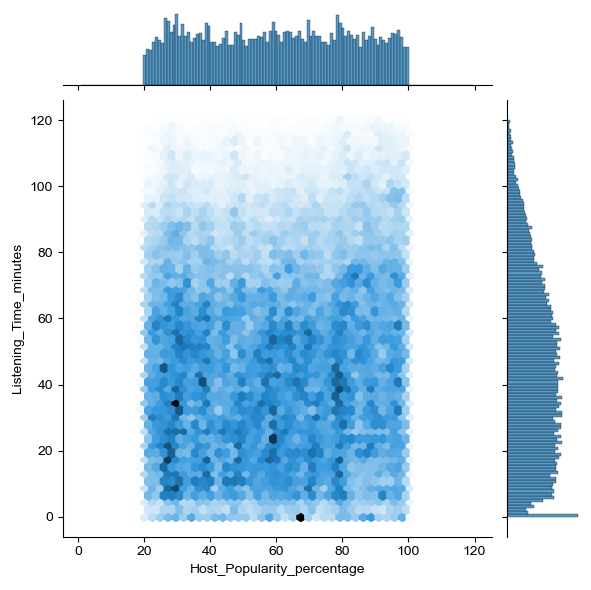

In [7]:
plt.figure(figsize=(5,3))
sns.jointplot(x='Host_Popularity_percentage',y='Listening_Time_minutes',data=train,kind='hex')
sns.set_style('dark')

<Figure size 500x300 with 0 Axes>

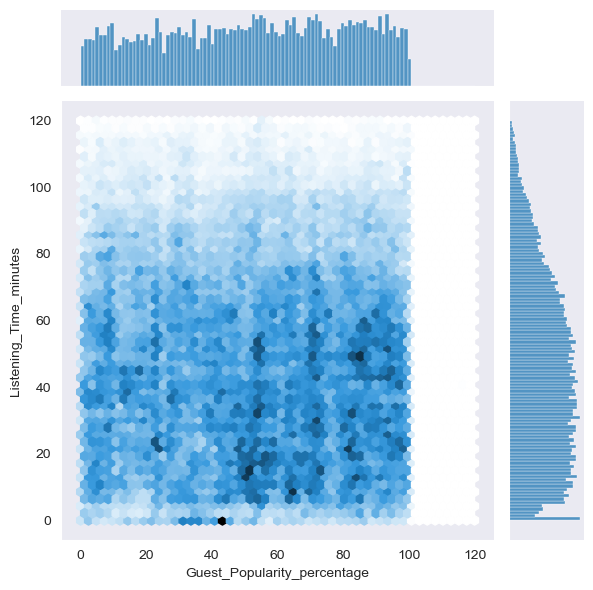

In [8]:
plt.figure(figsize=(5,3))
sns.jointplot(x='Guest_Popularity_percentage',y='Listening_Time_minutes',data=train,kind='hex')
sns.set_style('dark')

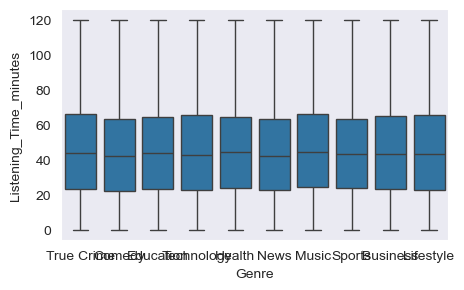

In [9]:
plt.figure(figsize=(5,3))
sns.boxplot(x='Genre',y='Listening_Time_minutes',data=train)
sns.set_style('dark')

<Figure size 500x300 with 0 Axes>

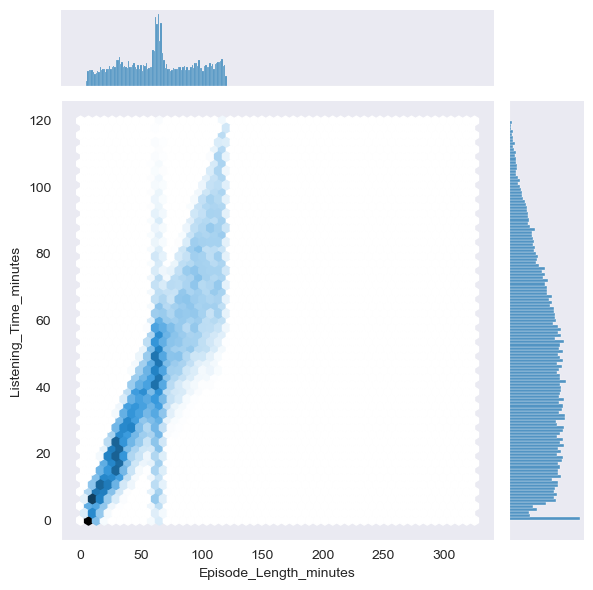

In [10]:
plt.figure(figsize=(5,3))
sns.jointplot(x='Episode_Length_minutes',y='Listening_Time_minutes',data=train,kind='hex')
sns.set_style('dark')

Text(0.5, 1.0, 'Correlation with Guest_Popularity_percentage')

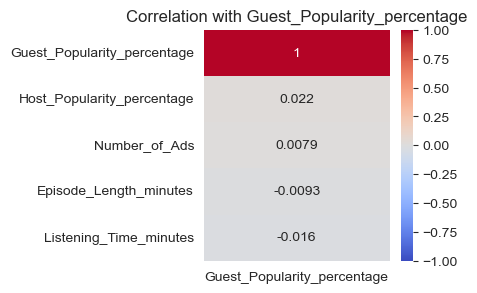

In [11]:
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train[numeric_cols].corr()

plt.figure(figsize=(3, 3))
sns.heatmap(corr_matrix[['Guest_Popularity_percentage']].sort_values(by='Guest_Popularity_percentage', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with Guest_Popularity_percentage")

In [12]:
bins = [0, 10, 50, 90, 100]
labels = ['Bottom 10%', 'Mid 40%', 'Top 40%', 'Top 10%']
for df in [train,test]:
    df['Host_Popularity_bin'] = pd.cut(df['Host_Popularity_percentage'], bins=bins, labels=labels)

In [13]:
bins = [0, 10, 50, 90, 100]
labels = ['Bottom 10%', 'Mid 40%', 'Top 40%', 'Top 10%']
import re
choices = ['Solo','Power_Pair','Strong_Pair']


for df in [train,test]:
    df['Host_Popularity_bin'] = pd.cut(df['Host_Popularity_percentage'], bins=bins, labels=labels)
    
    df['Publish_Day_Time'] = df['Publication_Day'] + '_' + df['Publication_Time']
    
    df['Episode_Num'] = df['Episode_Title'].str.extract(r'(\d+)').astype(float)

    df['No_Guest'] = df['Guest_Popularity_percentage'].isna().astype(int)
    df['Guest_Popularity_bin'] = pd.cut(df['Guest_Popularity_percentage'], bins=bins, labels=labels).cat.add_categories('No_Guest').fillna('No_Guest')

    df['Guest_Host_interaction'] = (df['Guest_Popularity_percentage'].astype(float))*(df['Host_Popularity_percentage'].astype(float))
    
    conditions = [
        (df['No_Guest'] == 1),
        (df['Host_Popularity_bin'] == 'Elite') & (df['Guest_Popularity_bin'].isin(['High', 'Elite'])),
        (df['Host_Popularity_bin'] == 'High') & (df['Guest_Popularity_bin'] == 'High')
    ]
    df['Host_Guest_Tier'] = np.select(conditions, choices, default='Standard')
    
    df['Ads_per_minute'] = df['Number_of_Ads']/df['Episode_Length_minutes']
    
    df['No_Ads'] = (df['Ads_per_minute'] == 0).astype(int)
    
    df['Ad_Density_Bin'] = pd.qcut(df['Ads_per_minute'], 4, labels=['Low', 'Mid', 'High'], duplicates='drop')
    
    df['Length_Bin'] = pd.cut(df['Episode_Length_minutes'],bins=[0, 10, 30, 60, 120, np.inf],labels=['Snack', 'Short', 'Medium', 'Long', 'Epic'])

    df['Popularity_Match'] = (df['Host_Popularity_percentage'] - df['Guest_Popularity_percentage']).abs()
    
    df['Episode_Length_bin'] = pd.qcut(df['Episode_Length_minutes'],q=4,labels=["snack", "small", "medium", "large"],duplicates='drop')
    

Text(0.5, 1.0, 'Listener Duration by Host Popularity Bin')

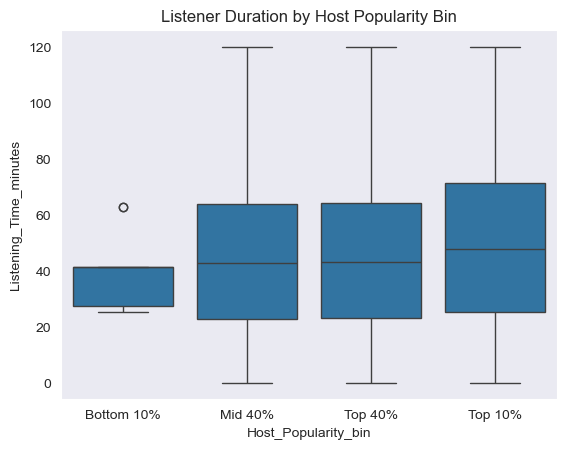

In [14]:
sns.boxplot(x='Host_Popularity_bin', y='Listening_Time_minutes', data=train)
plt.title("Listener Duration by Host Popularity Bin")

Text(0.5, 1.0, 'Mean Listener Duration by Host Popularity Bin')

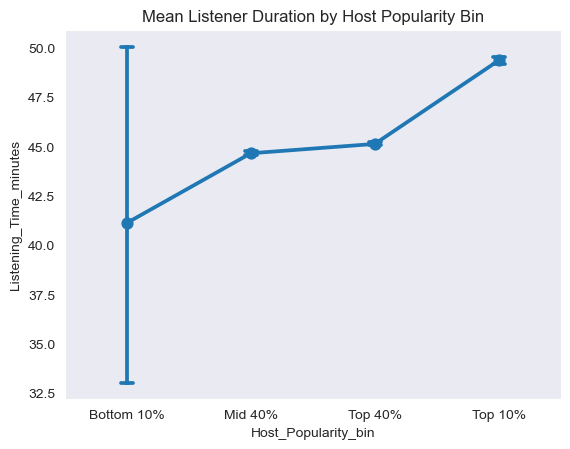

In [15]:
sns.pointplot(x='Host_Popularity_bin', y='Listening_Time_minutes', data=train, capsize=0.1)
plt.title("Mean Listener Duration by Host Popularity Bin")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'Thursday_Night'),
  Text(1, 0, 'Saturday_Afternoon'),
  Text(2, 0, 'Tuesday_Evening'),
  Text(3, 0, 'Monday_Morning'),
  Text(4, 0, 'Monday_Afternoon'),
  Text(5, 0, 'Sunday_Night'),
  Text(6, 0, 'Monday_Evening'),
  Text(7, 0, 'Thursday_Evening'),
  Text(8, 0, 'Saturday_Morning'),
  Text(9, 0, 'Wednesday_Afternoon'),
  Text(10, 0, 'Saturday_Evening'),
  Text(11, 0, 'Sunday_Afternoon'),
  Text(12, 0, 'Thursday_Afternoon'),
  Text(13, 0, 'Wednesday_Evening'),
  Text(14, 0, 'Saturday_Night'),
  Text(15, 0, 'Wednesday_Night'),
  Text(16, 0, 'Tuesday_Afternoon'),
  Text(17, 0, 'Tuesday_Night'),
  Text(18, 0, 'Friday_Morning'),
  Text(19, 0, 'Friday_Night'),
  Text(20, 0, 'Thursday_Morning'),
  Text(21, 0, 'Wednesday_Morning'),
  Text(22, 0, 'Sunday_Evening'),
  Text(23, 0, 'Monday_Night'),
  Text(24, 0, 'Friday_Evening'

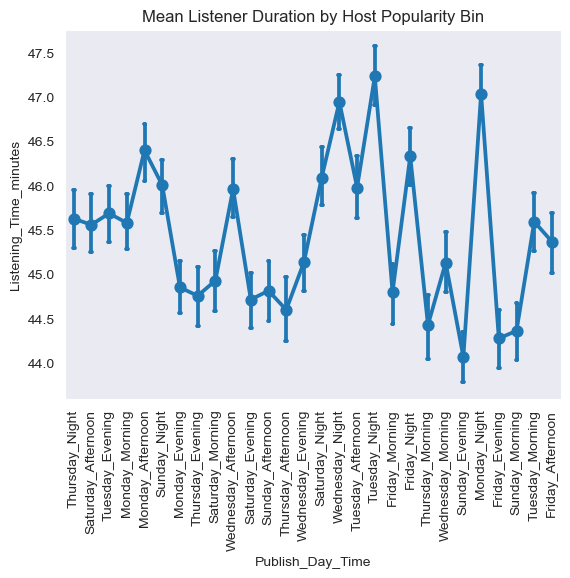

In [16]:
sns.pointplot(x='Publish_Day_Time', y='Listening_Time_minutes', data=train, capsize=0.1)
plt.title("Mean Listener Duration by Host Popularity Bin")
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, 'Low'), Text(1, 0, 'Mid'), Text(2, 0, 'High')])

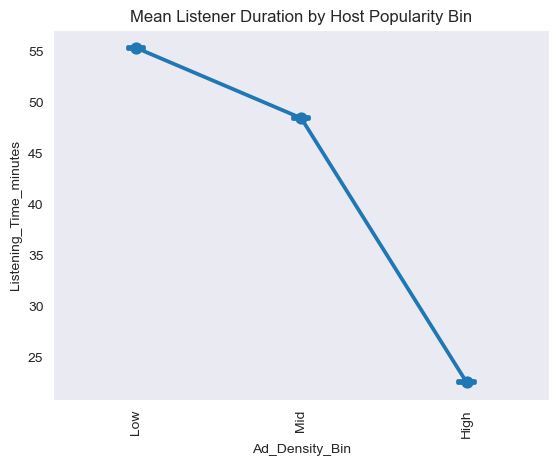

In [17]:
sns.pointplot(x='Ad_Density_Bin', y='Listening_Time_minutes', data=train, capsize=0.1)
plt.title("Mean Listener Duration by Host Popularity Bin")
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, 'snack'),
  Text(1, 0, 'small'),
  Text(2, 0, 'medium'),
  Text(3, 0, 'large')])

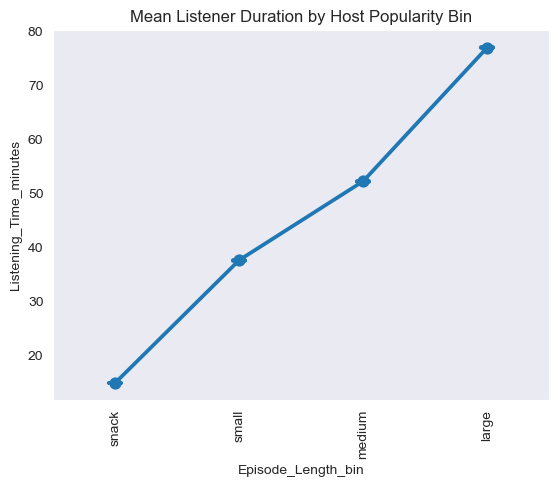

In [18]:
sns.pointplot(x='Episode_Length_bin', y='Listening_Time_minutes', data=train, capsize=0.1)
plt.title("Mean Listener Duration by Host Popularity Bin")
plt.xticks(rotation=90)

<Axes: xlabel='Publication_Time', ylabel='Episode_Sentiment'>

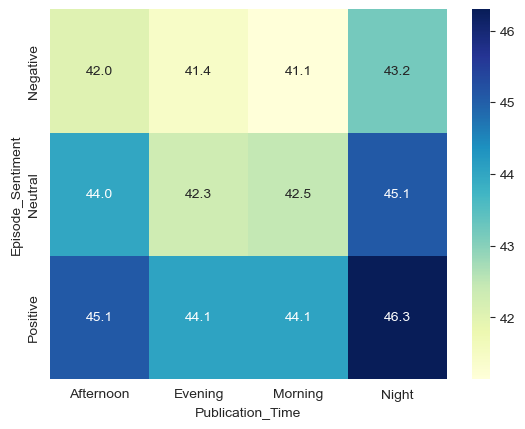

In [19]:

pivot = train.pivot_table(
    index='Episode_Sentiment', 
    columns='Publication_Time', 
    values='Listening_Time_minutes', 
    aggfunc='median'
)
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".1f")

<Axes: xlabel='Genre', ylabel='Episode_Sentiment'>

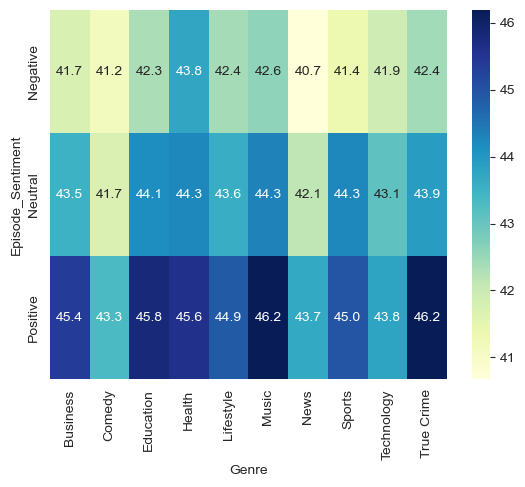

In [20]:

pivot = train.pivot_table(
    index='Episode_Sentiment', 
    columns='Genre', 
    values='Listening_Time_minutes', 
    aggfunc='median'
)
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".1f")

C:\Users\vedan\AppData\Local\Temp\ipykernel_7384\413350244.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = train.pivot_table(


<Axes: xlabel='Host_Popularity_bin', ylabel='Episode_Sentiment'>

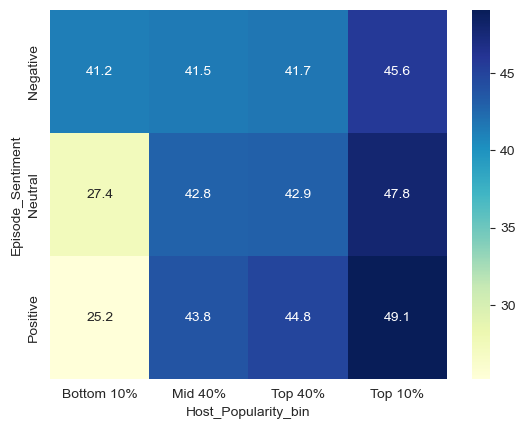

In [21]:
pivot = train.pivot_table(
    index='Episode_Sentiment', 
    columns='Host_Popularity_bin', 
    values='Listening_Time_minutes', 
    aggfunc='median'
)
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".1f")

C:\Users\vedan\AppData\Local\Temp\ipykernel_7384\1936763483.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = train.pivot_table(


<Axes: xlabel='Guest_Popularity_bin', ylabel='Episode_Sentiment'>

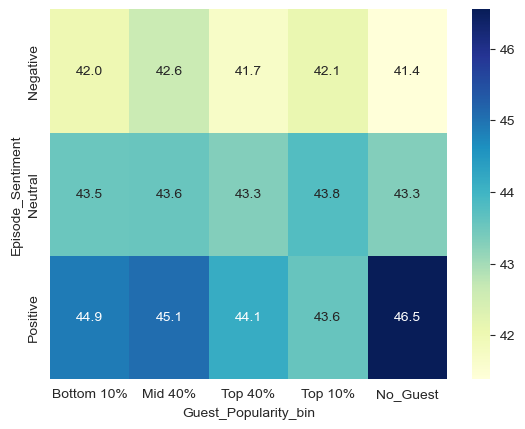

In [22]:
pivot = train.pivot_table(
    index='Episode_Sentiment', 
    columns='Guest_Popularity_bin', 
    values='Listening_Time_minutes', 
    aggfunc='median'
)
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".1f")

C:\Users\vedan\AppData\Local\Temp\ipykernel_7384\2249003518.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = train.pivot_table(


<Axes: xlabel='Host_Popularity_bin', ylabel='Genre'>

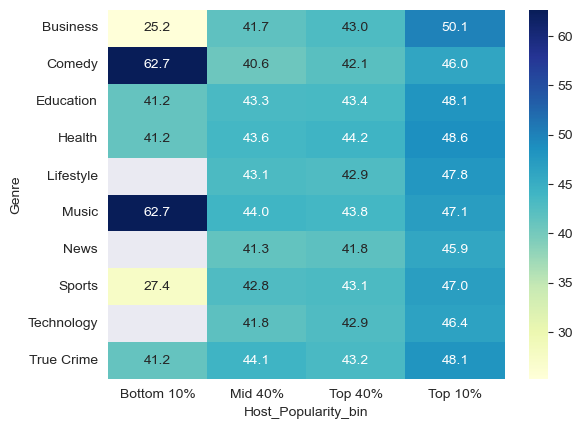

In [23]:
pivot = train.pivot_table(
    index='Genre', 
    columns='Host_Popularity_bin', 
    values='Listening_Time_minutes', 
    aggfunc='median'
)
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".1f")

C:\Users\vedan\AppData\Local\Temp\ipykernel_7384\2249003518.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = train.pivot_table(


<Axes: xlabel='Host_Popularity_bin', ylabel='Genre'>

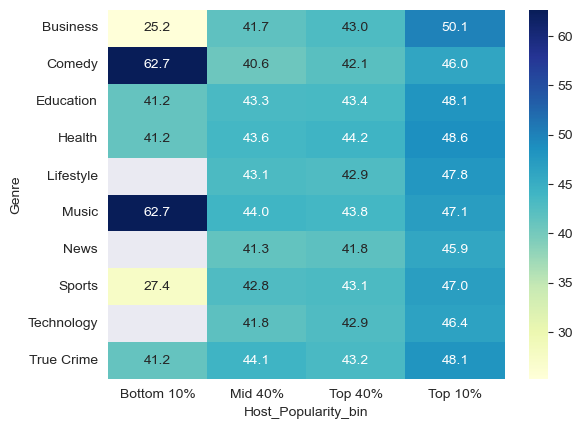

In [24]:
pivot = train.pivot_table(
    index='Genre', 
    columns='Host_Popularity_bin', 
    values='Listening_Time_minutes', 
    aggfunc='median'
)
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".1f")

In [25]:
X = train.drop(columns = 'Listening_Time_minutes')
y = train['Listening_Time_minutes']

In [26]:
X

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,...,No_Guest,Guest_Popularity_bin,Guest_Host_interaction,Host_Guest_Tier,Ads_per_minute,No_Ads,Ad_Density_Bin,Length_Bin,Popularity_Match,Episode_Length_bin
id,,,,,,,,,,,,,,,,,,,,,
0,Mystery Matters,Episode 98,63.84,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,...,1,No_Guest,NaN,Solo,0.000000,1,Low,Long,NaN,small
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,...,0,Top 40%,5084.8525,Standard,0.016694,0,Low,Long,9.00,large
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,...,0,Bottom 10%,627.6309,Standard,0.000000,1,Low,Long,61.00,medium
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,...,0,Top 40%,4503.2140,Standard,0.029775,0,Mid,Long,21.48,medium
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,...,0,Top 40%,4698.5076,Standard,0.027147,0,Mid,Long,21.39,large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,...,1,No_Guest,NaN,Solo,0.000000,1,Low,Long,NaN,medium
749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,...,1,No_Guest,NaN,Solo,0.026403,0,Mid,Long,NaN,medium
749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,...,0,Top 40%,6670.6562,Standard,0.000000,1,Low,Medium,6.31,snack


In [27]:
test

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,...,No_Guest,Guest_Popularity_bin,Guest_Host_interaction,Host_Guest_Tier,Ads_per_minute,No_Ads,Ad_Density_Bin,Length_Bin,Popularity_Match,Episode_Length_bin
id,,,,,,,,,,,,,,,,,,,,,
750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral,...,0,Top 40%,2032.4063,Standard,0.012665,0,Low,Long,15.22,medium
750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral,...,1,No_Guest,NaN,Solo,0.000000,1,Low,Short,NaN,snack
750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive,...,0,Top 10%,6619.9539,Standard,0.000000,1,Low,Long,29.62,medium
750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive,...,0,Top 40%,1210.9500,Standard,0.017333,0,Low,Long,28.35,large
750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral,...,0,Mid 40%,656.5300,Standard,0.027655,0,Mid,Long,46.80,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Mind & Body,Episode 100,21.05,Health,65.77,Saturday,Evening,96.40,3.0,Negative,...,0,Top 10%,6340.2280,Standard,0.142518,0,High,Short,30.63,snack
999996,Joke Junction,Episode 85,85.50,Comedy,41.47,Saturday,Night,30.52,2.0,Negative,...,0,Mid 40%,1265.6644,Standard,0.023392,0,Mid,Long,10.95,medium
999997,Joke Junction,Episode 63,12.11,Comedy,25.92,Thursday,Evening,73.69,1.0,Neutral,...,0,Top 40%,1910.0448,Standard,0.082576,0,High,Short,47.77,snack


In [28]:
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category')
    test[col] = test[col].astype('category')

<Axes: xlabel='Listening_Time_minutes', ylabel='Count'>

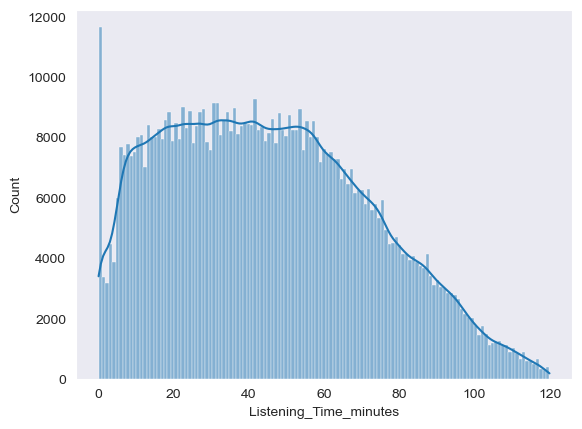

In [29]:
sns.histplot(train['Listening_Time_minutes'], kde=True)

<Axes: ylabel='Listening_Time_minutes'>

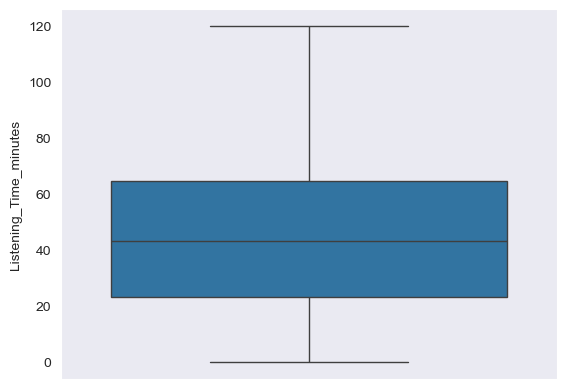

In [30]:
sns.boxplot(train['Listening_Time_minutes'])       

In [31]:
from scipy.stats import skew
skewness = skew(train['Listening_Time_minutes'])
print(f"Skewness: {skewness:.2f}")

Skewness: 0.35


In [32]:
from sklearn.preprocessing import LabelEncoder

# Convert object columns to category if not already
cat_cols = X.select_dtypes(include=['object', 'category']).columns

# Encode each
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

In [33]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import root_mean_squared_error
import numpy as np

# Assuming your dataset is called X and target is y
# X = your features
# y = your target variable

model = XGBRegressor(
    colsample_bytree=0.5,
    learning_rate=0.021326345278068825,
    max_depth=15,
    n_estimators=500,
    reg_alpha=0.01406945330446873,
    reg_lambda=0.0004797634565829893,
    subsample=1.0,
    verbosity=2,
    random_state=42,
    enable_categorical = True
)

# Fit on all data
model.fit(X, y)
y_pred = model.predict(X)
train_rmse = root_mean_squared_error(y, y_pred)
print(f"Train RMSE: {train_rmse:.4f}")

# 5-Fold Cross-Validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1)
cv_rmse_scores = -cv_scores
print(f"CV RMSE scores: {cv_rmse_scores}")
print(f"Mean CV RMSE: {cv_rmse_scores.mean():.4f}")

[00:08:13] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (750000, 23, 16811909).
Train RMSE: 7.1970
CV RMSE scores: [12.64805063 12.69020858 12.68961459 12.67630754]
Mean CV RMSE: 12.6760


In [34]:
preds = model.predict(test)

In [35]:
preds

array([53.36317  , 20.987112 , 51.142246 , ...,  7.9488153, 73.50808  ,
       60.14685  ], dtype=float32)

In [39]:
submission = pd.DataFrame({
    'id': df.index,  # or replace with your actual ID column
    'Listening_Time_minutes': preds
})

submission.to_csv('submission501.csv', index=False)


In [40]:
submission

,id,Listening_Time_minutes
0,750000,53.363171
1,750001,20.987112
2,750002,51.142246
3,750003,78.754845
4,750004,45.360729
...,...,...
249995,999995,10.323564
249996,999996,58.476555
249997,999997,7.948815
249998,999998,73.508080
